## Import libraries and modules needed 

In [1]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

(-0.5, 1079.5, 1439.5, -0.5)

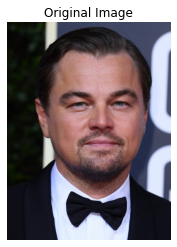

In [2]:
# Load the image
img_path='images/leo2.jpg'
image = cv2.imread(img_path)

# Show the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

## Image Preprocessing

In [3]:
def enhance_image(image):
    
    # Convert the image to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Split the LAB image into L, A, and B channels
    l, a, b = cv2.split(lab)

    # Apply histogram equalization to the L channel
    l_equalized = cv2.equalizeHist(l)

    # Merge the equalized L channel with the original A and B channels
    lab_equalized = cv2.merge((l_equalized, a, b))

    # Convert the LAB equalized image back to RGB color space
    enhanced_image = cv2.cvtColor(lab_equalized, cv2.COLOR_LAB2BGR)

    # Apply contrast adjustment
    alpha = 0.7
    adjusted = cv2.convertScaleAbs(enhanced_image, alpha=alpha)

    # Apply sharpening using the unsharp mask technique
    kernel_size = (9, 9)
    sigma = 1.0
    blurred = cv2.GaussianBlur(adjusted, kernel_size, sigma)
    sharpened = cv2.addWeighted(adjusted, 1.5, blurred, -0.5, 0)

    return sharpened

(-0.5, 1079.5, 1439.5, -0.5)

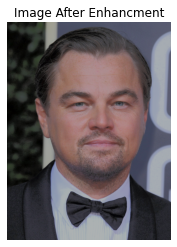

In [4]:
better_img = enhance_image(image)

plt.imshow(cv2.cvtColor(better_img, cv2.COLOR_BGR2RGB))
plt.title('Image After Enhancment')
plt.axis('off')

## Cascade Classifiers
<span style="color:gray">To make face, mouth, eye Detection we need to import some XMLs files using CascadeClassifier function from OpenCV module</span>

In [5]:
# Load the cascade classifiers
face_cascade = cv2.CascadeClassifier('XMLs/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('XMLs/haarcascade_eye.xml')
mouth_cascade = cv2.CascadeClassifier('XMLs/haarcascade_mcs_mouth.xml')

In [6]:
def face_eye_mouth(image):
    
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform face detection
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

    # Draw rectangles around the detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
        
    
        # Perform eye detection within each detected face
        face_gray = gray_image[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(face_gray, scaleFactor=1.1, minNeighbors=5)
    
        # Draw rectangles around the detected eyes
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(image, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (255, 0, 0), 1)
    
        # Perform mouth detection within each detected face
        mouth_gray = gray_image[y+int(h/2):y+h, x:x+w]
        mouths = mouth_cascade.detectMultiScale(mouth_gray, scaleFactor=1.1, minNeighbors=5)
    
        # Draw rectangles around the detected mouths
        for (mx, my, mw, mh) in mouths:
            cv2.rectangle(image, (x+mx, y+int(h/2)+my), (x+mx+mw, y+int(h/2)+my+mh), (0, 0, 255), 1)
            break;
    
    return image

In [7]:
detected = face_eye_mouth(better_img)

(-0.5, 1079.5, 1439.5, -0.5)

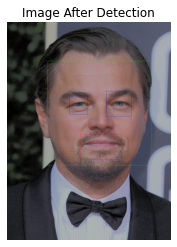

In [8]:
plt.imshow(cv2.cvtColor(detected, cv2.COLOR_BGR2RGB))
plt.title('Image After Detection')
plt.axis('off')

## Model 1 - Emotion Detector

In [9]:
# Convert to grayscale
img = Image.open(img_path).convert('L')  

# Preprocess image
img = img.resize((48, 48))
img = np.array(img) / 255.0
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=-1)

# Load Keras model
Emotion_Detector = load_model('Models/Emotion_Detector.h5')

# Labeling Facial Expressions
Emotion_label_dict = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Neutral', 5:'Sad', 6:'Surprise'}

# Generate prediction
Emotion_pred = Emotion_Detector.predict(img)[0]
pred_emotion = Emotion_label_dict[np.argmax(Emotion_pred)]

1/1 [==============================] - 0s 171ms/step


## Model 2 - Gender Detector

In [10]:
# Load image
img = Image.open(img_path)

# Preprocess image
img = img.resize((224, 224))
img = np.array(img) / 255.0
img = np.expand_dims(img, axis=0)

# Load Keras model
Gender_Detector = load_model('Models/Gender_Detector.h5')

# Labeling Facial Expressions
label_dict = {1:'Male', 0:'Female'}

# Generate prediction
Gender_pred = Gender_Detector.predict(img)[0]
pred_gender = label_dict[np.argmax(Gender_pred)]

1/1 [==============================] - 1s 559ms/step


(-0.5, 1079.5, 1439.5, -0.5)

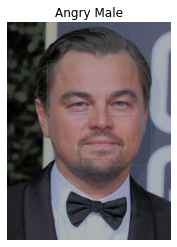

In [11]:
plt.imshow(cv2.cvtColor(detected, cv2.COLOR_BGR2RGB))
plt.title(pred_emotion + " " + pred_gender)
plt.axis('off')

## Model 3 - Age Prediction

In [12]:
# Load and preprocess the image
image = cv2.imread(img_path)
image = cv2.resize(image, (200, 200))
image = image / 255.0  # Normalize pixel values

# Reshape the image
image = np.reshape(image, (1, 200, 200, 3))

# Load Keras model
Age_predictor = load_model('Models/Age_model.h5')

# Make a prediction
prediction = Age_predictor.predict(image)

# Extract the predicted age
predicted_age = round(prediction[0][0])

print("Predicted Age is: {} Years old".format(predicted_age))

1/1 [==============================] - 0s 65ms/step
Predicted Age is: 26 Years old


(-0.5, 1079.5, 1439.5, -0.5)

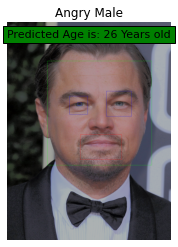

In [39]:
plt.text(0, 100, "Predicted Age is: {} Years old".format(predicted_age), fontsize=11, bbox=dict(facecolor='green', alpha=1))
plt.imshow(cv2.cvtColor(detected, cv2.COLOR_BGR2RGB))
plt.title(pred_emotion + " " + pred_gender)
plt.axis('off')

## Color Palette Extractor From Image

In [14]:
#!pip install extcolors
#!pip install colormap
#!pip install easydev

In [15]:
import matplotlib.patches as patches
import matplotlib.image as mpimg
import extcolors
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from colormap import rgb2hex
import pandas as pd

In [16]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

In [17]:
colors_x = extcolors.extract_from_path(img_path, tolerance = 12, limit = 12)

df_color = color_to_df(colors_x)
df_color

,c_code,occurence
0,#0F0F19,537700
1,#AA7263,174875
2,#E1E9FE,170889
3,#444A64,117762
4,#D4A3A6,117045
5,#7D564F,113509
6,#0A1004,66980
7,#29272A,51329
8,#593735,42533
9,#C7D6FF,27703


(-0.5, 1919.5, 1079.5, -0.5)

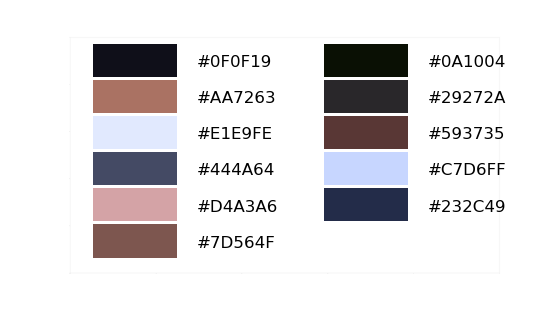

In [18]:
list_color = list(df_color['c_code'])

#create background color
fig, ax = plt.subplots(figsize=(192,108),dpi=10)
fig.set_facecolor('white')
plt.savefig('bg.png')
plt.close(fig)

bg = plt.imread('bg.png')

#create color palette
fig = plt.figure(figsize=(70, 70), dpi = 8)
ax = fig.add_subplot(1,1,1)

x_posi, y_posi, y_posi2 = 320, 25, 25
for c in list_color:
    if  list_color.index(c) <= 5:
        y_posi += 125
        rect = patches.Rectangle((x_posi, y_posi), 290, 115, facecolor = c)
        ax.add_patch(rect)
        ax.text(x = x_posi+360, y = y_posi+80, s = c, fontdict={'fontsize': 150})
    else:
        y_posi2 += 125
        rect = patches.Rectangle((x_posi + 800, y_posi2), 290, 115, facecolor = c)
        ax.add_artist(rect)
        ax.text(x = x_posi+1160, y = y_posi2+80, s = c, fontdict={'fontsize': 150})
        
plt.imshow(bg)
plt.tight_layout()
plt.axis('off')